In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [1]:
# import data science and visualization libraries

import warnings
warnings.filterwarnings("ignore")
import boto3
from sagemaker import get_execution_role
import sys,os
import pandas as pd
import numpy as np
import sagemaker.amazon.common as smac
import io
from pathlib import Path
import shutil
from sklearn.model_selection import train_test_split
from io import StringIO
import json
from sklearn import metrics
from sagemaker.amazon.amazon_estimator import get_image_uri
import sagemaker
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!aws s3 ls s3://sec-students2016/sam1610 --recursive
    

2020-04-29 09:35:08     698612 sam1610
2020-02-18 11:05:08          0 sam1610/
2020-04-14 11:28:35    2742565 sam1610/aws_data.csv
2020-04-26 08:31:55    5994825 sam1610/aws_data_classification.csv
2020-04-15 08:54:58    5897018 sam1610/aws_data_regression.csv
2020-04-28 06:12:04     694922 sam1610/inference_std.csv
2020-02-18 14:29:22      17752 sam1610/model/xgboost-Students-v1-2020-02-18-14-25-40-858/output/model.tar.gz
2020-03-09 18:19:13      17753 sam1610/model/xgboost-Students-v1-2020-03-09-18-16-13-213/output/model.tar.gz
2020-04-15 09:41:04       1340 sam1610/output/job-Student-1586943322/output/model.tar.gz
2020-04-29 11:28:51       1335 sam1610/output/job-Student-1588159437/output/model.tar.gz
2020-04-13 10:02:30       3625 sam1610/output/linear-learner-2020-04-13-09-58-30-398/output/model.tar.gz
2020-03-09 18:13:56      31346 sam1610/train.csv
2020-04-29 11:18:06    9281760 sam1610/train/linear_train.data
2020-04-29 09:40:06    2320800 sam1610/valid/linear_train.data
2020-0

In [6]:
pd.set_option('display.max_columns', 500)     # Make sure we can see all of the columns
pd.set_option('display.max_rows', 50)         # Keep the output on one page

In [77]:

# sec-students2016/sam1610/aws_data.csv 

bucket = "sec-students2016"
prefix = "sam1610"
key= prefix + "/aws_data_regression.csv"

# i can read the file in float32
# df=pd.read_csv(location,dtype='float32')
#data = pd.read_csv('dt_encoded.csv', dtype='float32').values
boto3.resource('s3').Bucket(bucket).download_file(key, "data.csv")



In [80]:
df=pd.read_csv("data.csv", header=None) #,dtype="float32").values
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109
0,53.7,92.9,0,1,28.0,17.0,45.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,49.7,89.5,0,1,27.0,14.0,41.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,52.1,86.2,0,1,27.0,13.0,27.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,52.9,89.9,0,1,26.0,15.0,44.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,52.1,86.2,0,1,25.0,14.0,31.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,80.6,99.1,0,1,30.0,20.0,50.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,79.8,99.2,0,1,30.0,20.0,48.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,67.0,95.8,0,1,28.0,16.0,44.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,64.8,95.4,0,1,30.0,19.0,45.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,52.1,85.5,0,1,26.0,14.0,35.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [81]:
df.drop(1, axis=1, inplace=True)

In [82]:
df[0]=((df[0]>60)+0)

In [83]:
df[0].value_counts()

0    19424
1     4748
Name: 0, dtype: int64

In [84]:
df[df.isna().any(axis=1)]

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109


In [85]:
df.dropna(inplace=True)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
train_data, valid_data, test_data = np.split(df.sample(frac=1, random_state=42), 
                                                  [int(0.7 * len(df)), int(0.9*len(df))])  

In [92]:
train_data.to_csv('data/logistic/train.csv', index=False, header=False)
valid_data.to_csv('data/logistic/valid.csv', index=False, header=False)
test_data.drop(0, axis=1).to_csv('data/logistic/test.csv', index=False, header=False)

In [94]:
import sagemaker
import boto3, os
                     
 
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'logistic/train/train.csv')).upload_file('data/logistic/train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'logistic/validation/validation.csv')).upload_file('data/logistic/valid.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'logistic/test/test.csv')).upload_file('data/logistic/test.csv')

# Define   train . validation location 

In [95]:
s3_input_train = sagemaker.s3_input(s3_data=f's3://{bucket}/{prefix}/logistic/train', content_type='csv')
s3_input_validation = sagemaker.s3_input(s3_data=f's3://{bucket}/{prefix}/logistic/validation/', content_type='csv')
s3_data = {'train': s3_input_train, 'validation': s3_input_validation}

#  Launching Model Tuning job

In [104]:
from sagemaker.amazon.amazon_estimator import get_image_uri

from sagemaker.estimator import Estimator
sess = sagemaker.Session()
region = boto3.Session().region_name    

container = get_image_uri(region, 'xgboost', repo_version='0.90-2')

xgb = Estimator(
    
    container,                                               # The algorithm (XGBoost)
    role=sagemaker.get_execution_role(),                     # IAM permissions for SageMaker
    sagemaker_session=sess,                                  # Technical object
                                    
    input_mode='File',                                       # Copy the dataset and then train
    output_path=f's3://{bucket}/{prefix}/logistic/output' ,  # Save the model here
                                    
    train_instance_count=1,                                  # Instance requirements
    train_instance_type='ml.m4.2xlarge',
                                    
    train_use_spot_instances=True,                           # Use a spot instance
    train_max_run=300,                                       # Max training time
    train_max_wait=600,                                      # Max training time + spot waiting time
)

xgb.set_hyperparameters(objective='binary:logistic', 
                        num_round=100,
                        early_stopping_rounds=10)



In [105]:
from sagemaker.tuner import IntegerParameter, ContinuousParameter
# https://sagemaker.readthedocs.io/en/stable/tuner.html

hyperparameter_ranges = {
    'eta': ContinuousParameter(0, 1),
    'min_child_weight': ContinuousParameter(1, 10),
    'alpha': ContinuousParameter(0, 2),
    'max_depth': IntegerParameter(1, 10)
}

In [106]:
objective_metric_name = 'validation:auc'
objective_type = 'Maximize'

In [107]:
from sagemaker.tuner import HyperparameterTuner
# https://sagemaker.readthedocs.io/en/stable/tuner.html

tuner = HyperparameterTuner(
    xgb,
    objective_metric_name,
    hyperparameter_ranges,
    objective_type=objective_type,
    max_jobs=40,
    max_parallel_jobs=4)

In [108]:
tuner.fit(s3_data)

# Job Inspection

In [112]:
from sagemaker.analytics import HyperparameterTuningJobAnalytics

exp = HyperparameterTuningJobAnalytics(
    sagemaker_session=sess, 
    hyperparameter_tuning_job_name=tuner.latest_tuning_job.name
)

In [113]:
df_inspect = exp.dataframe()

In [115]:
df_inspect.head()

,FinalObjectiveValue,TrainingElapsedTimeSeconds,TrainingEndTime,TrainingJobName,TrainingJobStatus,TrainingStartTime,alpha,eta,max_depth,min_child_weight
0,NaN,NaN,NaT,sagemaker-xgboost-200430-0638-016-22e67af1,InProgress,NaT,1.682381,0.348767,8.0,1.036302
1,NaN,NaN,NaT,sagemaker-xgboost-200430-0638-015-32d93033,InProgress,NaT,0.868516,0.264183,7.0,6.272661
2,NaN,NaN,NaT,sagemaker-xgboost-200430-0638-014-c0189f0c,InProgress,2020-04-30 06:50:31+00:00,0.574532,0.243676,5.0,3.117387
3,NaN,NaN,NaT,sagemaker-xgboost-200430-0638-013-de2b6499,InProgress,NaT,1.748441,0.330142,4.0,3.000020
4,0.92765,61.0,2020-04-30 06:48:27+00:00,sagemaker-xgboost-200430-0638-012-f1f75b02,Completed,2020-04-30 06:47:26+00:00,0.061837,0.954125,7.0,2.014360


In [116]:
df_inspect.sort_values('FinalObjectiveValue', ascending=0)[:1]

,FinalObjectiveValue,TrainingElapsedTimeSeconds,TrainingEndTime,TrainingJobName,TrainingJobStatus,TrainingStartTime,alpha,eta,max_depth,min_child_weight
5,0.934903,57.0,2020-04-30 06:48:48+00:00,sagemaker-xgboost-200430-0638-011-e3e24d83,Completed,2020-04-30 06:47:51+00:00,1.768441,0.320142,4.0,2.91002


#  Deploying the best model

In [118]:
from time import strftime, gmtime
timestamp = strftime('%d-%H-%M-%S', gmtime())

xgb_endpoint = tuner.deploy(
    endpoint_name = f'DEMO-xgboost-dm-{format(timestamp)}',
    initial_instance_count = 1,                    # Infrastructure requirements
    instance_type = 'ml.m4.xlarge'
)

2020-04-30 06:48:48 Starting - Preparing the instances for training
2020-04-30 06:48:48 Downloading - Downloading input data
2020-04-30 06:48:48 Training - Training image download completed. Training in progress.
2020-04-30 06:48:48 Uploading - Uploading generated training model
2020-04-30 06:48:48 Completed - Training job completedINFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter _tuning_objective_metric value validation:auc to Json.
Returning the value itself
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[06:48:3

# Model Prediction 

In [156]:
sm = boto3.Session().client(service_name='runtime.sagemaker') 

test_samples = [line.rstrip('\n') for line in open('data/logistic/test.csv')]
test_samples = test_samples[:100] # We'll predict the first 100 samples

for sample in test_samples:
    sample = bytes(sample, 'utf-8')
    response = sm.invoke_endpoint(EndpointName=xgb_endpoint.endpoint, 
                                  ContentType='text/csv', 
                                  Body=sample)
   
    
    print(response['Body'].read())



b'0.3975834250450134'
b'0.20969054102897644'
b'0.06105032190680504'
b'0.0066861496306955814'
b'0.07548671215772629'
b'0.9622692465782166'
b'0.024272523820400238'
b'0.24071747064590454'
b'0.0006697744829580188'
b'0.00034920262987725437'
b'0.0010742642916738987'
b'0.0024452111683785915'
b'0.17088735103607178'
b'0.0012378955725580454'
b'0.008011046797037125'
b'0.09780655801296234'
b'0.000563702720683068'
b'0.20992088317871094'
b'0.007220434490591288'
b'0.056396037340164185'
b'0.17717094719409943'
b'0.789543092250824'
b'0.4960240423679352'
b'0.00036962731974199414'
b'0.03806350752711296'
b'0.030781999230384827'
b'0.42721471190452576'
b'0.020490875467658043'
b'0.7290651202201843'
b'0.000302284985082224'
b'0.0001879613264463842'
b'0.6404641270637512'
b'0.010624164715409279'
b'0.0004653272626455873'
b'0.4819255471229553'
b'0.07394358515739441'
b'0.2651188373565674'
b'0.0005810667644254863'
b'0.13402335345745087'
b'0.9655011296272278'
b'0.2369798719882965'
b'0.0057501839473843575'
b'0.12207908

In [155]:
preds

[0.006181209348142147]

#  batch  transformation 

In [124]:
from sagemaker.predictor import csv_serializer, json_deserializer

xgb_endpoint.content_type = 'text/csv'
xgb_endpoint.serializer = csv_serializer
xgb_endpoint.deserializer = json_deserializer

In [135]:
test_data.head()

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109
14818,0,1,1,30.0,18.0,49.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
18428,0,1,0,29.5,17.5,46.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
767,0,0,1,30.0,17.0,37.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5693,0,0,1,28.0,12.0,40.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9700,0,0,0,29.0,18.5,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [143]:
a=pd.read_csv("data/logistic/test.csv",  dtype='float32').values[0:10]

In [151]:
result = xgb_endpoint.predict(test_data.drop(0, axis=1).values[0])
print(result)

0.3975834250450134


In [46]:
train_file="linear_train.data"    
train_path = f"{prefix}/train/{train_file}"
buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, np.array(X_train).astype('float32'), np.array(y_train).astype('float32'))
buf.seek(0)
boto3.resource('s3').Bucket(bucket).Object(f'{train_path}').upload_fileobj(buf)
#  same : boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', val_file)).upload_fileobj(buf)

In [47]:
valid_file="linear_valid.data"    
valid_path = f"{prefix}/valid/{valid_file}"
buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, np.array(X_holdout).astype('float32'), np.array(y_holdout).astype('float32'))
buf.seek(0)
boto3.resource('s3').Bucket(bucket).Object(f'{valid_path}').upload_fileobj(buf)
#  Same : boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation', val_file)).upload_fileobj(buf)

In [48]:
!aws s3 ls s3://$bucket/$prefix --recursive

2020-04-29 09:35:08     698612 sam1610
2020-02-18 11:05:08          0 sam1610/
2020-04-14 11:28:35    2742565 sam1610/aws_data.csv
2020-04-26 08:31:55    5994825 sam1610/aws_data_classification.csv
2020-04-15 08:54:58    5897018 sam1610/aws_data_regression.csv
2020-04-28 06:12:04     694922 sam1610/inference_std.csv
2020-02-18 14:29:22      17752 sam1610/model/xgboost-Students-v1-2020-02-18-14-25-40-858/output/model.tar.gz
2020-03-09 18:19:13      17753 sam1610/model/xgboost-Students-v1-2020-03-09-18-16-13-213/output/model.tar.gz
2020-04-15 09:41:04       1340 sam1610/output/job-Student-1586943322/output/model.tar.gz
2020-04-13 10:02:30       3625 sam1610/output/linear-learner-2020-04-13-09-58-30-398/output/model.tar.gz
2020-03-09 18:13:56      31346 sam1610/train.csv
2020-04-29 11:18:06    9281760 sam1610/train/linear_train.data
2020-04-29 09:40:06    2320800 sam1610/valid/linear_train.data
2020-04-29 11:21:30    2320800 sam1610/valid/linear_valid.data
2020-03-09 18:13:56       3929 s

In [49]:
from sagemaker.amazon.amazon_estimator import get_image_uri
container = get_image_uri(boto3.Session().region_name, 'linear-learner')

In [50]:
 
#s3_train_data = f"s3://{bucket}/{train_path}"

s3_train_data =f"s3://{bucket}/{prefix}/train/{train_file}"
s3_validation_data =f"s3://{bucket}/{prefix}/valid/{valid_file}"   
output_location = f's3://{bucket}/{prefix}/output'
#data_channel={'train':   ,  'validation': }

In [51]:
in_config_train = sagemaker.s3_input(s3_data=s3_train_data)

in_config_valid = sagemaker.s3_input(s3_data=s3_validation_data)



In [52]:
X_train.shape

(19337, 108)

In [53]:
np.arange(0.01,0.7,0.09)

array([0.01, 0.1 , 0.19, 0.28, 0.37, 0.46, 0.55, 0.64])

In [54]:
# job_name="Student-"+  time.strftime("Y%-%m-%d-%H-%M-%S", time.gmtime())
job_name=f"job-Student-{int(time.time())}"

sess = sagemaker.Session()

role = get_execution_role()


linear = sagemaker.estimator.Estimator(container,
                                   role, 
                                   train_instance_count=1, 
                                   train_instance_type='ml.c4.xlarge',
                                   output_path=f's3://{bucket}/{prefix}/output',
                                   sagemaker_session=sess)

linear.set_hyperparameters(feature_dim=108, epochs=150, 
                           num_models=40, 
                           loss='squared_loss',
                           predictor_type='regressor', 
                           mini_batch_size=30, 
                           normalize_data=True, 
                           normalize_label=False,
                           learning_rate =0.01,
                           train_use_spot_instances=True,
                          
#                               'eta': ContinuousParameter(0, 1),
#     'min_child_weight': ContinuousParameter(1, 10),
#     'alpha': ContinuousParameter(0, 2),
#     'max_depth': IntegerParameter(1, 10), 
                           optimizer="sgd",
                          
                          
                          )

linear.fit({'train': f"s3://{bucket}/{train_path}"}, job_name=job_name)



2020-04-29 11:23:57 Starting - Starting the training job...
2020-04-29 11:23:59 Starting - Launching requested ML instances......
2020-04-29 11:25:06 Starting - Preparing the instances for training...
2020-04-29 11:25:49 Downloading - Downloading input data......
2020-04-29 11:26:50 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[04/29/2020 11:26:53 INFO 140473425450816] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'init_m

In [55]:

linear_predictor = linear.deploy(initial_instance_count=1,
                                 instance_type='ml.t2.medium', endpoint_name="Students-endpoint")

-----------------!

In [56]:

from sagemaker.predictor import csv_serializer, json_deserializer

linear_predictor.content_type = 'text/csv'
linear_predictor.serializer = csv_serializer
linear_predictor.deserializer = json_deserializer

In [57]:

result = linear_predictor.predict(X_holdout.values)

In [58]:

predictions = [ x['score'] for x in result["predictions"]]

# compute the RMSE of our predictions
print(f"RSME: {np.sqrt(metrics.mean_squared_error(y_holdout.values, predictions))}")

RSME: 7.364749985286646


In [59]:

print(f"R2: {np.sqrt(metrics.r2_score(y_holdout.values, predictions))}")

R2: 0.740630950959475


In [60]:
print(f"Explained Variance Score : {np.sqrt(metrics.explained_variance_score(y_holdout.values, predictions, multioutput='uniform_average' ))}")

Explained Variance Score : 0.740689755075045


In [61]:
# Use Holdout DataSet
print("Holdout DataSet")
prediction_df = pd.DataFrame({
        'actual NAT': y_holdout.values,
        'predicted NAT': predictions
    })
prediction_df[' diff'] = prediction_df['actual NAT'] - prediction_df['predicted NAT']
prediction_df.head(10)

Holdout DataSet


,actual NAT,predicted NAT,diff
0,56.7,50.616642,6.083358
1,57.5,60.661388,-3.161388
2,44.2,54.518848,-10.318848
3,47.0,50.590172,-3.590172
4,61.6,58.391418,3.208582
5,68.3,63.372372,4.927628
6,45.2,54.027622,-8.827622
7,45.2,38.388493,6.811507
8,45.8,45.237370,0.562630
9,71.2,58.544186,12.655814


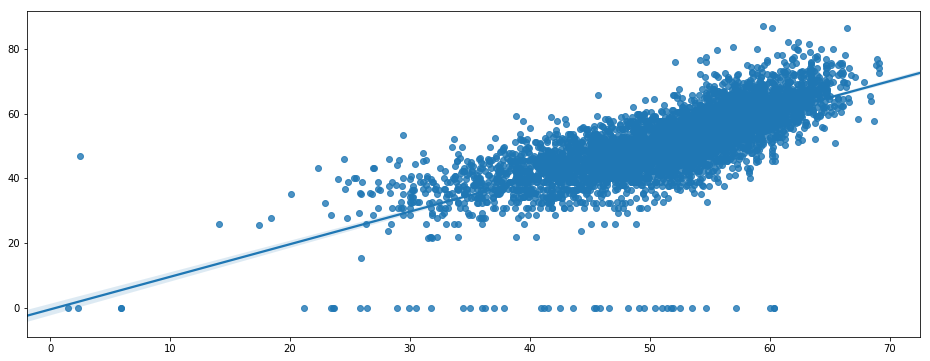

In [62]:
plt.figure(figsize=(16, 6))
sns.regplot(np.array(predictions),np.array(y_holdout.values))

In [49]:
linear_predictor.delete_endpoint()

In [4]:
! ls -l


total 9992
-rw-rw-r-- 1 ec2-user ec2-user  274080 Apr 14 04:53 1-3-2020-Copy1.ipynb
-rw-rw-r-- 1 ec2-user ec2-user  412004 Mar 10 11:06 1-3-2020.ipynb
-rw-rw-r-- 1 ec2-user ec2-user  460462 Apr 14 12:00 14_4_2020..ipynb
drwxrwxrwx 3 ec2-user ec2-user    4096 Feb 18 11:57 analyze_results_2020-02-18
drwxrwxr-x 9 ec2-user ec2-user    4096 Feb 19 08:18 AWS-ML-SageMaker
-rw-rw-r-- 1 ec2-user ec2-user   23793 Mar  9 18:38 classification.ipynb
drwxrwxr-x 2 ec2-user ec2-user    4096 Apr 14 11:28 data
-rw-rw-r-- 1 ec2-user ec2-user 5897018 Apr 15 09:15 data.csv
-rw-rw-r-- 1 ec2-user ec2-user 1153768 Mar 11 08:29 df_encoded.csv
-rw-rw-r-- 1 ec2-user ec2-user  180466 Feb 23 10:01 dt.csv
-rw-rw-r-- 1 ec2-user ec2-user  301673 Mar  5 08:33 dt_encoded.csv
drwxrwxrwx 3 ec2-user ec2-user    4096 Mar 10 18:44 imageclassification_caltech_2020-03-10
drwxrwxrwx 3 ec2-user ec2-user    4096 Feb 18 06:55 linear_learner_mnist_2020-02-18
drwxrwxrwx 3 ec2-user ec2-user    4096 Apr  6 09:36 linear_learner_multic

In [2]:
! pip install   xgboost


    100% |████████████████████████████████| 109.8MB 390kB/s eta 0:00:01 8% |██▊                             | 9.4MB 40.2MB/s eta 0:00:03
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# XGBoost 
import xgboost as xgb

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/distributed/config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text) or {})


In [4]:
dfr=pd.read_csv("data.csv", header=None)
dfr.head()

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,53.7,92.9,0,1,28.0,17.0,45.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,49.7,89.5,0,1,27.0,14.0,41.5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,52.1,86.2,0,1,27.0,13.0,27.5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,52.9,89.9,0,1,26.0,15.0,44.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,52.1,86.2,0,1,25.0,14.0,31.5,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
dfr.drop([1], axis=1, inplace=True)

In [6]:
dfr[dfr[0]!=0].head()

,0,2,3,4,5,6,7,8,9,10,...,100,101,102,103,104,105,106,107,108,109
0,53.7,0,1,28.0,17.0,45.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,49.7,0,1,27.0,14.0,41.5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,52.1,0,1,27.0,13.0,27.5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,52.9,0,1,26.0,15.0,44.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,52.1,0,1,25.0,14.0,31.5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
train_d, valid_d, test_d=np.split(dfr[dfr[0]!=0].sample(frac=1, random_state=42), [int(.7*len(dfr)), int(.9*len(dfr))])

In [8]:

X_train = train_d.iloc[:,1:] # Features: 1st column onwards 
y_train = train_d.iloc[:,0].ravel() # Target: 0th column

X_validation = valid_d.iloc[:,1:]
y_validation = valid_d.iloc[:,0].ravel()

In [9]:
regressor = xgb.XGBRegressor(max_depth=5,n_estimators=150)

In [10]:

regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:36.72447	validation_1-rmse:36.53476
[1]	validation_0-rmse:26.10585	validation_1-rmse:25.93776
[2]	validation_0-rmse:18.79858	validation_1-rmse:18.64130
[3]	validation_0-rmse:13.85572	validation_1-rmse:13.73125
[4]	validation_0-rmse:10.59692	validation_1-rmse:10.49797
[5]	validation_0-rmse:8.53152	validation_1-rmse:8.46767
[6]	validation_0-rmse:7.29377	validation_1-rmse:7.26753
[7]	validation_0-rmse:6.57435	validation_1-rmse:6.58224
[8]	validation_0-rmse:6.16456	validation_1-rmse:6.19247
[9]	validation_0-rmse:5.95065	validation_1-rmse:5.99564
[10]	validation_0-rmse:5.82968	validation_1-rmse:5.90034
[11]	validation_0-rmse:5.75274	validation_1-rmse:5.83181
[12]	validation_0-rmse:5.70451	validation_1-rmse:5.78661
[13]	validation_0-rmse:5.67292	validation_1-rmse:5.76352
[14]	validation_0-rmse:5.65149	validation_1-rmse:5.75116
[15]	validation_0-rmse:5.63203	validation_1-rmse:5.73513
[16]	validation_0-rmse:5.61132	validation_1-rmse:5.71768
[17]	validation_0-rmse:5.59391	

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=150, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [11]:

eval_result = regressor.evals_result()

In [12]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

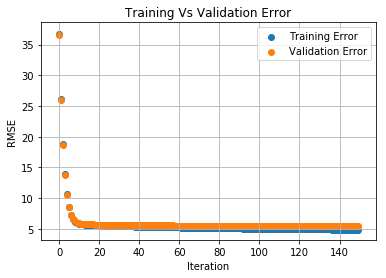

In [13]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

In [14]:
X_test=test_d.iloc[:,1:]
y_test=test_d.iloc[:,0].ravel

In [15]:
result = regressor.predict(X_test)

In [16]:

test_d['NAT_predicted'] = result

In [17]:
test_d['NAT_predicted'].describe().T

count    2236.000000
mean       51.746033
std         8.260005
min        27.925360
25%        45.642570
50%        51.077822
75%        57.633273
max        77.903603
Name: NAT_predicted, dtype: float64

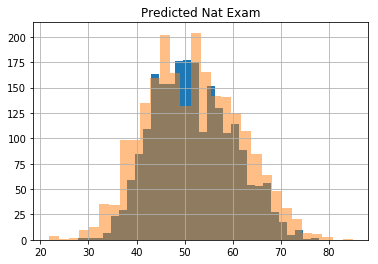

In [18]:
test_d['NAT_predicted'].hist(bins=30)
test_d[0].hist( alpha=0.5, bins=30)
plt.title('Predicted Nat Exam')
plt.show()

In [19]:
test_d['NAT_predicted']=result

In [20]:
test_d.reset_index(drop=True)

,0,2,3,4,5,6,7,8,9,10,...,101,102,103,104,105,106,107,108,109,NAT_predicted
0,50.5,0,0,30.0,17.0,49.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,58.492821
1,59.7,1,0,30.0,18.0,45.5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,62.512405
2,58.6,1,0,29.0,18.0,35.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,54.361801
3,60.8,1,1,30.0,20.0,50.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,67.674522
4,48.8,0,0,29.0,20.0,49.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,52.680038
5,53.7,1,1,30.0,18.0,45.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,58.756931
6,51.7,1,0,29.0,19.0,34.5,0,0,0,0,...,0,0,0,0,0,0,0,0,1,46.739708
7,51.3,1,1,29.0,17.0,36.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,49.584702
8,39.0,1,1,30.0,12.0,11.0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,39.142300
9,49.5,1,0,25.0,16.0,22.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,41.782272


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


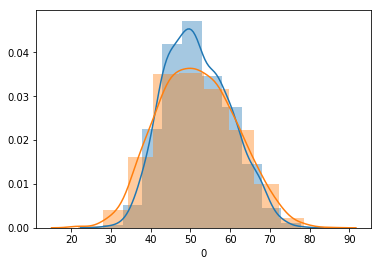

In [21]:
import seaborn as sns
sns.distplot( test_d['NAT_predicted'], bins=10)
sns.distplot( test_d[0], bins=10)
plt.show()

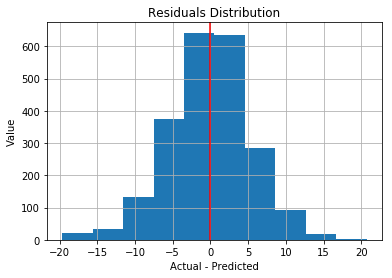

In [22]:

# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (test_d[0] - test_d['NAT_predicted'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Value')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

In [23]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:0.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:0.2f}'.format(value_counts[False]/len(residuals)))

 Under Estimation: 0.51
 Over  Estimation: 0.49


In [24]:

print("RMSE: {0:0.2f}".format(mean_squared_error(test_d[0],test_d['NAT_predicted'])**.5))

RMSE: 5.44


In [25]:
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [26]:
print("RMSLE: {0}".format(compute_rmsle( test_d[0],test_d['NAT_predicted'])))

RMSLE: 0.110117553951747


In [37]:
index=np.argsort(regressor.feature_importances_)[::-1]
index

array([  4, 105,  43,  90,  12,  93,  47,  21,  44,  36, 106,   5,   8,
        58, 107,  25,   1,  38,  69,   3,  49,  61,  28,  75,  82,  72,
        92,  67,  37,  81,  70,  78,  41,  77,  33,  40,   0,  20, 100,
        87,  51,  27,  19,  14,  88,  42,  35,   6,  23,  86,  98,  73,
        59,  85,  64,  71,  55,  45,  10,  97,  99,  54,   7,  34,  74,
         2,  18,  24, 101,  16,  80,  89,  50,  96,  62,  13,  32, 103,
        53,  31,  29,  95,  22,  79,  17,   9,  57,  60,  15,  11,  46,
        94,  30,  56, 104,  26,  65,  91,  66,  76,  83,  84,  39,  68,
        63,  52,  48, 102])

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
X_train=train_d.iloc[:,1:]
y_train=train_d.iloc[:,0].ravel

In [172]:
xgb1 = xgb.XGBRegressor(nthread=-1)
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}


In [173]:
gb = GridSearchCV(xgb1,params )


In [ ]:
# gb.fit(X_train,y_train)
# gb.best_score_
# gb.best_param_

In [43]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 2:], df[0]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42 )
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_test1, y_test1, test_size=0.5)

In [ ]:
 hyperparameter_ranges = {
    'lerning_rate': ContinuousParameter(0, 1),
    'min_child_weight': ContinuousParameter(1, 10),
    'alpha': ContinuousParameter(0, 2),
    'max_depth': IntegerParameter(1, 10)
}

In [ ]:

s3_train_data =f"s3://{bucket}/{prefix}/train/{train_file}"
s3_validation_data =f"s3://{bucket}/{prefix}/valid/{valid_file}"   
output_path = f's3://{bucket}/{prefix}/output'

In [ ]:
 from sagemaker.amazon.amazon_estimator import get_image_uri

from sagemaker.estimator import Estimator
# https://sagemaker.readthedocs.io/en/stable/estimators.html
sess = sagemaker.Session()
region = boto3.Session().region_name    

container = get_image_uri(boto3.Session().region_name, 'linear-learner')
xgb =  sagemaker.estimator.Estimator(
    
    container,                                               # The algorithm (XGBoost)
    role=sagemaker.get_execution_role(),                     # IAM permissions for SageMaker
    sagemaker_session=sess,                                  # Technical object
                                    
    input_mode='File',                                       # Copy the dataset and then train
    output_path=f's3://{bucket}/{prefix}/output',,  # Save the model here
                                    
    train_instance_count=1,                                  # Instance requirements
    train_instance_type='ml.m4.2xlarge',
                                    
    train_use_spot_instances=True,                           # Use a spot instance
    train_max_run=300,                                       # Max training time
    train_max_wait=600,  
    normalize_data=True
    # Max training time + spot waiting time
)

xgb.set_hyperparameters(objective='regressor', 
                        num_round=100,
                        early_stopping_rounds=10)

In [ ]:

objective_metric_name = 'squared_loss'
objective_type = 'Maximize'

In [ ]:
tuner = HyperparameterTuner(
    xgb,
    objective_metric_name,
    hyperparameter_ranges,
    objective_type=objective_type,
    max_jobs=40,
    max_parallel_jobs=4)